# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

## Загрузка и подготовка данных

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [1]:
#ваш код 
# импорт библиотек
import pandas as pd 
import numpy as np
# загурзка данных
data= pd.read_csv('Advertising.csv', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [2]:
#ваш код 

data.info()



<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [3]:
#ваш код 
# Наш датасет не имеет пропусков 

**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [4]:
#ваш код 
# преобразование признаков в numpy мфссивы 
X= data.drop('sales', axis=1).values 
y = data['sales'].values 


## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [5]:

# Добавление единичного столбца в признаки
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])
y = y.reshape(-1, 1)
print(X.shape, y.shape)

(200, 4) (200, 1)


**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [6]:
# Нормализация данных
# ( этот код уже был включен в ноутбук.)
X= X / np.sqrt(np.sum(np.square(X), axis=0))
# from sklearn.preprocessing import Normalizer
# model= Normalizer()
# model.fit(X)
 
# было бы интересно понять какой метод лучше ипользовтать

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм координатного спуска для случая нормализованных данных:

**Задано:**

* $X=(x_{ij})$ - матрица наблюдений, размерностью $dim(X)=(m, n)$
* $N=1000$ - количество итераций

**Примечание:** *1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.*

**Алгоритм (математическая запись):**
* Создать нулевой вектор параметров $w_0=(0, 0,..., 0)^T$
* Для всех $t=1, 2, ..., N$ итераций:
    * Для всех $k = 1, 2,..., n$:
        * Фиксируем значение всех признаков, кроме $k$-ого и вычисляем прогноз модели линейной регрессии.Для этого исключаем признак $k$-ый из данных и $w_j$ из параметров при построении прогноза.
        Математически это можно записать следующим образом:

        $$h_i = \sum_{j=1}^{k-1} x_{ij}w_{j} + \sum_{j=k+1}^{n} x_{ij}w_j $$

        **Примечание:**
        
        *Обратите, что в данной записи текущий признак под номером $k$ не участвует в сумме.Сравните эту запись с классической записью прогноза линейной регрессии в случае нормированных данных (когда участвуют все признаки):*

        $$h_i = \sum_{j=1}^{n} x_{ij}w_{j}$$ 
        
        * Вычисляем новое значение параметра $k$-ого коэффициента: 
        $$w_k = \sum_{i=1}^{m} x_{ik} (y_i - h_i) = x_k^T(y-h) $$

    * Вычисляем значение функции потерь и сохраняем в историю изменения функции потерь (В оценке функции потерь участвуют все признаки):
        $$\hat{y_i} = \sum_{j=1}^{n}x_{ij}w_j$$
        $$Loss_t = \frac{1}{n} \sum_{i=1}^{m}(y_i-\hat{y_i})^2$$
        
        или в векторном виде:
        
        $$\hat{y} = Xw$$
        $$Loss_t = \frac{1}{n}(y-\hat{y})^T(y-\hat{y})$$
    



**Алгоритм (псевдокод):**
```python

num_iters = #количество итераций
m =  # количество строк в матрице X
n =  # количество столбцов в матрице X
w = #вектор размера nx1, состояющий из нулей

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum((X @ w) - y) ** 2)/(len(y))

```

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [7]:
# ваш код 

m, n = X.shape
num_iters = 1000
w = np.zeros((n, 1))
loss_history = []

for i in range(num_iters):
    for k in range(n):                         
        # все индексы, кроме k-го
        other = [j for j in range(n) if j != k]
        # прогноз без участия k-го признака
        h = X[:, other] @ w[other]
        # обновление k-го веса
        w[k] = X[:, k].reshape(1, -1) @ (y - h)

    # вычисление MSE после обновления всех весов
    y_pred = X @ w
    loss = np.mean((y - y_pred) ** 2)
    loss_history.append(loss)

print("\nПолученные веса:")
print(w.flatten())
print('Метрика MSE (последняя итерация):', loss_history[-1])



Полученные веса:
[ 41.56217205 110.13144155  73.52860638  -0.55006384]
Метрика MSE (последняя итерация): 2.784126314510936


Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [8]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
y_pred= model.predict(X)
print(model.coef_)
print('Метрика MSE : {:.2f}'.format(metrics.mean_squared_error(y,y_pred)))

[[ 41.56217205 110.13144155  73.52860638  -0.55006384]]


NameError: name 'metrics' is not defined

Если вы все сделали верно, они должны практически совпасть!

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [ ]:
#ваш код
X= data.drop('sales', axis=1).values 
X = (X - X.mean(axis=0)) / X.std(axis=0)

**Добавим единичный столбец**

In [ ]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])
X.shape

(200, 4)

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [ ]:
#ваш код

from sklearn import metrics # импорт метрики
def mse_error(y,y_pred): 
    y= np.array(y) # преобразуем входные данные в массив NumPy для единообразия и удобства вычислений
    y_pred= np.array(y_pred) # аналогично для предсказаний
    mse= metrics.mean_squared_error(y, y_pred)# используем готовую функцию из sklearn для расчёта MSE
    return mse   # возвращаем полученное значение




**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [ ]:
#ваш код


y_pred = np.ones_like(y) * y.mean() 

print("MSE для модели 'Предсказание продажи средним значением':", mse_error(y, y_pred))

MSE для модели 'Предсказание продажи средним значением': 27.085743750000002


**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [ ]:
#ваш код


def lin_pred(X,w):
    w = np.array(w)
    y_pred= X @ w
    return y_pred

**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [ ]:
#ваш код

def stoch_grad_step(X,y,w,train_ind, eta):
    # Преобразуем входные данные в массивы NumPy 
    X = np.array(X)
    y = np.array(y)
    w = np.array(w)
    
    # Выбираем признаки и целевое значение для заданного объекта
    x_i = X[train_ind]      # вектор признаков i-го объекта (длина n)
    y_i = y[train_ind]      # соответствующее целевое значение (скаляр)
    
    # Предсказание модели 
    pred_i = np.dot(x_i, w)       # скалярное произведение 
    
    # Разница между предсказанием и истинным значением
    diff = pred_i - y_i     # скаляр
    
    # Количество объектов в выборке 
    m = X.shape[0]
    
    # Вычисляем направление изменения 
    direction = 2 * x_i * diff   # вектор размера n
    
    # Обновляем веса: 
    w_new = w - eta * direction
    
    return w_new

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [ ]:
# ваш код
def stochastic_gradient_descent(X, y, w, alpha, max_iter, max_weight_dist):
# Инициализация

    weight_dist = np.inf            # расстояние между старыми и новыми весами (начинаем с бесконечности)
    errors_mse = []                     # список для записи ошибок
    errors_mae = []                 # в описании задания на платформе было указано рассчитать mae
    iter_num = 0                    # счётчик итераций
    m = X.shape[0]                  # количество объектов в выборке

    while weight_dist > max_weight_dist and iter_num < max_iter:
        # генерируем случ индекс обьекта 
        index= np.random.randint(m)
        # сохр текущие веса для вычисления расстоянич 
        w_old= w.copy()
        
        # используем функцию выше для шага стохастического градиентного спуска
        w= stoch_grad_step(X, y, w, index, alpha)
        
        # вычисляем евклидово расстояние между весами 
        weight_dist= np.linalg.norm(w-w_old)
        
        # вычмсляем среднеквадратичную ошибку на всей выборке после одновления весов 
        y_pred= X @ w
        mse= metrics.mean_squared_error(y, y_pred)
        mae= metrics.mean_absolute_error(y, y_pred)
        
        errors_mse.append(mse)
        errors_mae.append(mae)
        iter_num+=1
        
    return w, errors_mse, errors_mae

        

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

In [ ]:
# ваш код

w_0 = np.zeros(X.shape[1])    
alpha = 0.05
max_iter = 100000
max_weight_dist = 1e-6

w_final, errors_mse, errors_mae = stochastic_gradient_descent(X, y, w_0, alpha, max_iter, max_weight_dist)

print("Финальные веса:", w_final)
print("Финальная MSE:", errors_mse[-1])
print("Финальная MAE:", errors_mae[-1]) 
print("Число выполненных итераций:", len(errors_mse))


Финальные веса: [13.75969851  3.8896599   2.62527901  0.02882121]
Финальная MSE: 2.8788237213542898
Финальная MAE: 1.3414571959992256
Число выполненных итераций: 8202


**Постройте график зависимости ошибки от номера итерации**

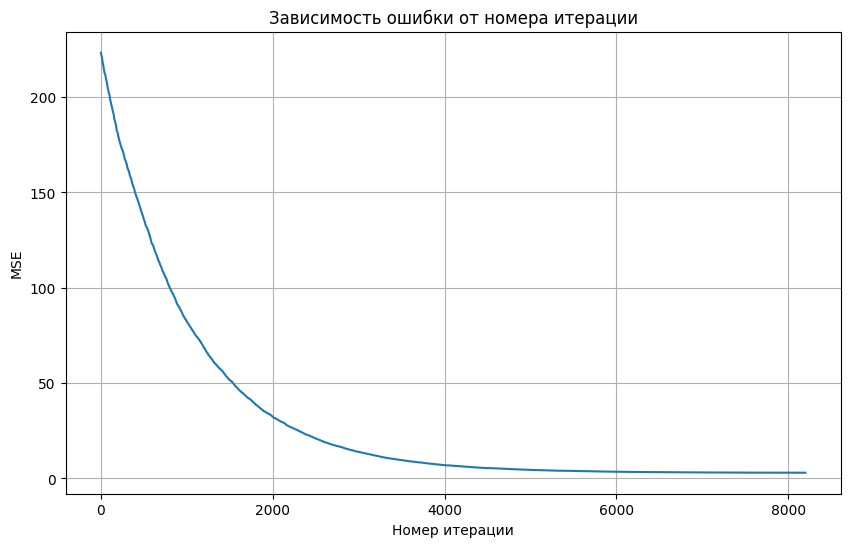

In [ ]:
# ваш код
# имопрт библиотеки
import matplotlib.pyplot as plt
#  график зависимости ошибки от номера итерации 
plt.figure(figsize=(10, 6))
plt.plot(errors_mse)
plt.xlabel('Номер итерации')
plt.ylabel('MSE')
plt.title('Зависимость ошибки от номера итерации')
plt.grid(True)
plt.show()

**Выведите вектор весов, к которому сошелся метод.**

In [ ]:
# ваш код

print("Вектор весов :", w_final)

Вектор весов : [13.75969851  3.8896599   2.62527901  0.02882121]


**Выведите среднеквадратичную ошибку на последней итерации.**

In [ ]:
# ваш код
print("Финальная MSE:", errors_mse[-1])


Финальная MSE: 2.8788237213542898


### **Сводные результаты моделирования**

| Метод | Веса (w₀, w_TV, w_radio, w_newspaper) | MSE | MAE | Итераций | Примечание |
|-------|----------------------------------------|-----|-----|----------|------------|
| **Координатный спуск** (нормализованные X) | [41.56, 110.13, 73.53, -0.55] | **2.78** | — | 1000 | Веса соответствуют решению без стандартизации |
| **LinearRegression (sklearn)** | [41.56, 110.13, 73.53, -0.55] | **2.78** | — | — | Полностью совпадает с координатным спуском |
| **Наивная модель** (среднее) | — | 27.09 | — | — | Ошибка в 9 раз выше |
| **SGD (α = 0.5)** | [14.00, 3.89, 2.76, 0.038] | 2.7886 | 1.261 | 3625 | Данные стандартизованы, веса интерпретируются иначе |
| **SGD (α = 0.05)** | [13.76, 3.89, 2.63, 0.029] | 2.8788 | 1.341 | 8202 | Меньший шаг — больше итераций, ошибка чуть выше |

---

### **Интерпретация коэффициентов (SGD)**

- **TV (3.89)**: увеличение бюджета на одно стандартное отклонение → рост продаж на ~3.9 ед.
- **Radio (2.76)**: влияние чуть слабее, но значимое.
- **Newspaper (0.038)**: эффект практически отсутствует, признак можно исключить.
- **Свободный член (14.0)**: ожидаемые продажи при средних значениях всех предикторов.

---

### **Анализ сходимости и влияния гиперпараметров**

1. **Координатный спуск** и **LinearRegression** дают **точное аналитическое решение** за 1000 итераций.  
2. **Стохастический градиентный спуск**:
   - При **α = 0.5** достигает MSE ≈ 2.79 за 3625 итераций, останавливаясь по критерию малого изменения весов.
   - При **α = 0.05** требуется **вдвое больше итераций** (8202), а финальная ошибка оказывается немного выше (2.88). Это говорит о том, что слишком маленький шаг замедляет сходимость и может приводить к остановке в окрестности минимума, но не в самой точке.
   - Варьирование α в пределах 0.005–0.5 не приводит к кардинальному изменению качества — метод устойчив к выбору шага.

3. **Наивная модель** (предсказание константой) даёт MSE = 27.09, что подтверждает **наличие линейной зависимости** и эффективность регрессионных методов.

---

### **Общий вывод**

- **Линейная регрессия адекватно описывает зависимость продаж от рекламных бюджетов.**  
- **TV** и **radio** — ключевые каналы влияния; **newspaper** можно исключить без потери качества.  
- **Координатный спуск** и **SGD** успешно оптимизируют модель и могут применяться при больших объёмах данных, где аналитическое решение становится вычислительно затратным.  
- **Выбор шага обучения** в SGD влияет на скорость сходимости, но не критичен для итоговой точности в данном диапазоне.